# Задание 2

Cравнивать абсолютные значения не очень удобно. Давайте посчитаем динамику показателей в относительных величинах.

Задание:

Дополните запрос из предыдущего задания и теперь для каждого дня, представленного в таблицах user_actions и courier_actions, дополнительно рассчитайте следующие показатели:

1. Прирост числа новых пользователей.
2. Прирост числа новых курьеров.
3. Прирост общего числа пользователей.
4. Прирост общего числа курьеров.
Показатели, рассчитанные на предыдущем шаге, также включите в результирующую таблицу.

Колонки с новыми показателями назовите соответственно new_users_change, new_couriers_change, total_users_growth, total_couriers_growth. Колонку с датами назовите date.

Все показатели прироста считайте в процентах относительно значений в предыдущий день. При расчёте показателей округляйте значения до двух знаков после запятой.

Результирующая таблица должна быть отсортирована по возрастанию даты.

Поля в результирующей таблице: 

date, new_users, new_couriers, total_users, total_couriers, 

new_users_change, new_couriers_change, total_users_growth, total_couriers_growth

```sql
WITH new_us AS (
  SELECT
    ua.time :: date AS date,
    count(distinct ua.user_id) AS new_users
  FROM
    user_actions ua
  WHERE
    (ua.time :: date, ua.user_id) in (
      SELECT
        MIN(time :: date),
        user_id
      FROM
        user_actions
      GROUP BY
        user_id
    )
  GROUP BY
    1
),
new_cour AS (
  SELECT
    ca.time :: date AS date,
    count(distinct ca.courier_id) AS new_couriers
  FROM
    courier_actions ca
  WHERE
    (ca.time :: date, ca.courier_id) in (
      SELECT
        MIN(time :: date),
        courier_id
      FROM
        courier_actions
      GROUP BY
        courier_id
    )
  GROUP BY
    1
),
subq AS (
  SELECT
    *,
    (
      SUM(new_users) OVER(
        ORDER BY
          date
      )
    ) :: int AS total_users,
    (
      SUM(new_couriers) OVER(
        ORDER BY
          date
      )
    ) :: int AS total_couriers
  FROM
    new_us
    JOIN new_cour using (date)
  ORDER BY
    date
)
SELECT
  *,
  ROUND(
    new_users :: decimal / LAG(new_users, 1) OVER() * 100 - 100,
    2
  ) AS new_users_change,
  ROUND(
    new_couriers :: decimal / LAG(new_couriers, 1) OVER() * 100 - 100,
    2
  ) AS new_couriers_change,
  ROUND(
    total_users :: decimal / LAG(total_users, 1) OVER() * 100 - 100,
    2
  ) AS total_users_growth,
  ROUND(
    total_couriers :: decimal / LAG(total_couriers, 1) OVER() * 100 - 100,
    2
  ) AS total_couriers_growth
FROM
  subq
```

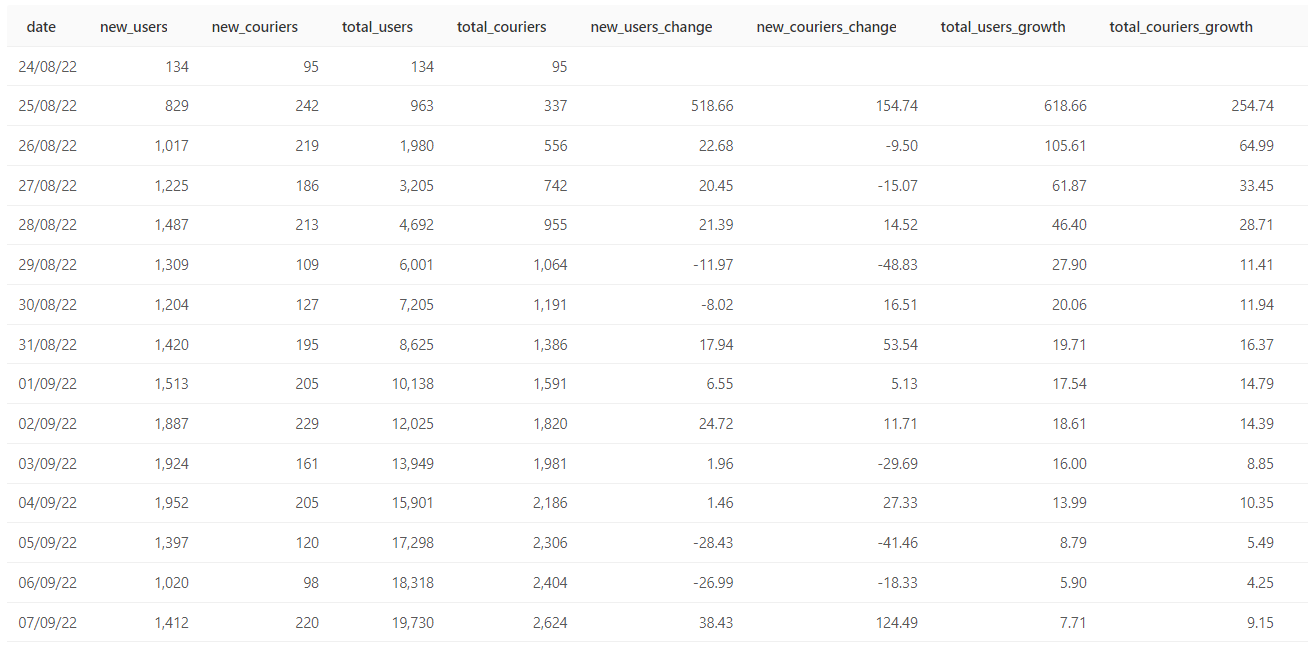

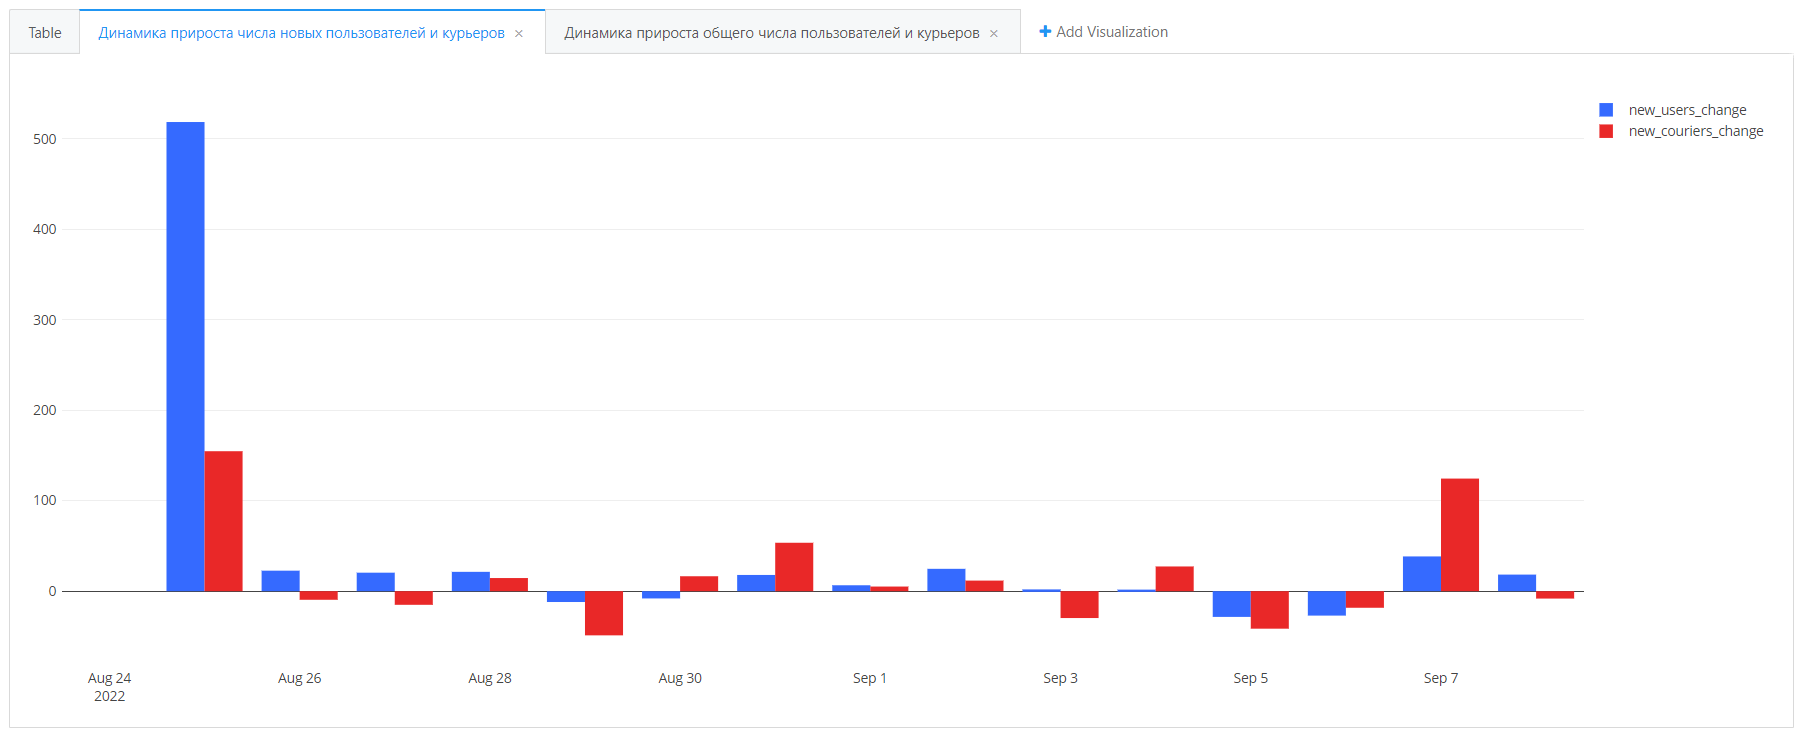

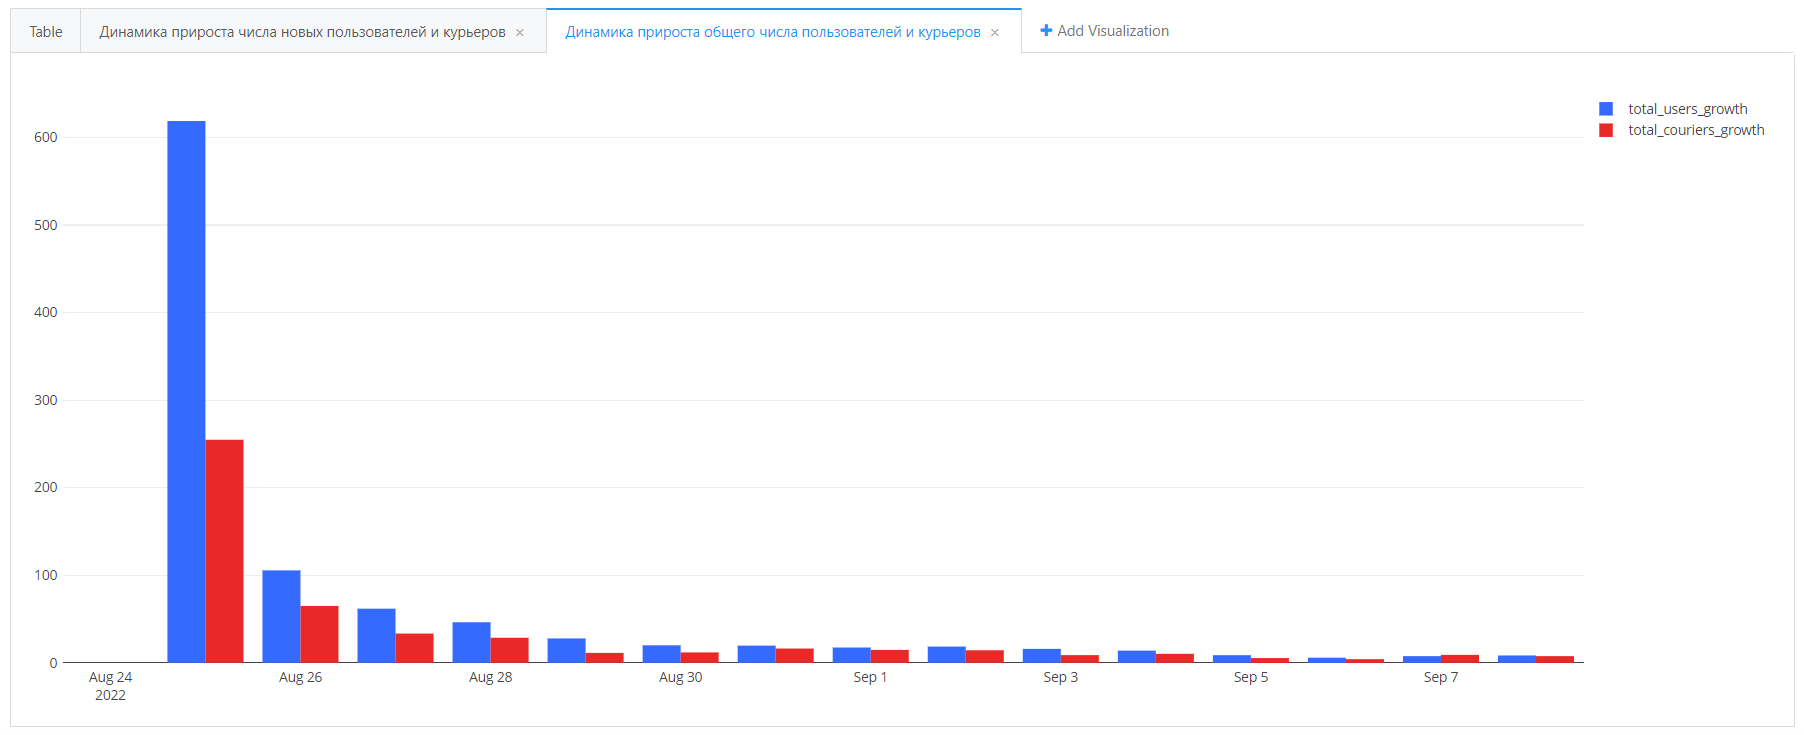